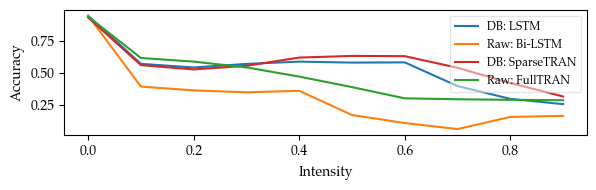

In [3]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load JSON data
def load_json_data(filepath):
    with open(filepath, 'r') as file:
        return json.load(file)

lstm_data = load_json_data('saturation_lstm_db.json')['data']
lstm_bi_data = load_json_data('saturation_bilstm_no_db.json')['data']
transformer_data = load_json_data('saturation_transformer_sparse_no_db.json')['data']
transformer_data_raw = load_json_data('saturation_transformer_full_raw.json')['data']

# Extract intensities and accuracies
def extract_data(data):
    intensities = [item[0] for item in data]
    accuracies = [item[1] for item in data]
    return intensities, accuracies

intensities_lstm, accuracies_lstm = extract_data(lstm_data)
intensities_lstm_bi, accuracies_lstm_bi = extract_data(lstm_bi_data)
intensities_transformer, accuracies_transformer = extract_data(transformer_data)
intensities_transformer_raw, accuracies_transformer_raw = extract_data(transformer_data_raw)

# Set the font
plt.rcParams.update({'font.family': 'Palatino', 'font.size': 10})

# Set seaborn color palette
colors = sns.color_palette("tab10")

# Plot
fig, ax = plt.subplots(figsize=(6, 2))
ax.plot(intensities_lstm, accuracies_lstm, label='DB: LSTM', color=colors[0])
ax.plot(intensities_lstm_bi, accuracies_lstm_bi, label='Raw: Bi-LSTM', color=colors[1])
ax.plot(intensities_transformer, accuracies_transformer, label='DB: SparseTRAN', color=colors[3])

ax.plot(intensities_transformer_raw, accuracies_transformer_raw, label='Raw: FullTRAN', color=colors[2])

# Adding axis labels
ax.set_xlabel('Intensity')
ax.set_ylabel('Accuracy')

# Add legend to the plot
ax.legend(loc='best', fontsize='small', fancybox=True, framealpha=0.5)

plt.tight_layout()

plt.savefig('/Users/oscarb/Downloads/saturation_metrics.pdf', format='pdf')
plt.show()
